# TGA Calculation for monolayer

This little notebook demonstrates [Thermogravimetric analysis](https://en.wikipedia.org/wiki/Thermogravimetric_analysis) that was used for a project of the analysis of hierarchical materials coated with one organic monolayer. Here, it had been oleic acid and squalene. The entire calculation was done within Excel VBA but can be done within any programming language. Here, it will shortely be introduced in python notebook.

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
data = pd.read_table('20180117_BFX_12_600°C.txt', sep="\s+", encoding= 'unicode_escape', header=[0,1])
data

,Index,Ts,t,HF,Gewicht,Tr
,[#],[°C],[s],[mW],[mg],[°C]
0,0,2.89543e+001,0.00000e+000,-7.07984,31.9133,25.0000
1,1,2.89199e+001,1.00000e+000,-7.34655,31.9135,25.1667
2,2,2.89252e+001,2.00000e+000,-6.83294,31.9143,25.3333
3,3,2.89702e+001,3.00000e+000,-5.72068,31.9162,25.5000
4,4,2.90247e+001,4.00000e+000,-4.28816,31.9207,25.6667
...,...,...,...,...,...,...
5247,5247,6.00082e+002,5.24700e+003,64.81330,31.5025,600.0000
5248,5248,6.00087e+002,5.24800e+003,64.81250,31.5025,600.0000
5249,5249,6.00085e+002,5.24900e+003,64.81140,31.5025,600.0000


In order not to have problems later, we'll merge the two headers into one. How does the header structure look like?

In [85]:
data.columns

MultiIndex([(  'Index',  '[#]'),
            (     'Ts', '[°C]'),
            (      't',  '[s]'),
            (     'HF', '[mW]'),
            ('Gewicht', '[mg]'),
            (     'Tr', '[°C]')],
           )

In [86]:
def merge_header(x):
    ar = []
    for head in x:
        ar.append("_".join(head))
    return ar

In [87]:
cols = merge_header(data.columns)
cols

['Index_[#]', 'Ts_[°C]', 't_[s]', 'HF_[mW]', 'Gewicht_[mg]', 'Tr_[°C]']

In [88]:
data.columns=cols

In [89]:
data.head(3)

,Index_[#],Ts_[°C],t_[s],HF_[mW],Gewicht_[mg],Tr_[°C]
0,0,2.89543e+001,0.00000e+000,-7.07984,31.9133,25.0000
1,1,2.89199e+001,1.00000e+000,-7.34655,31.9135,25.1667
2,2,2.89252e+001,2.00000e+000,-6.83294,31.9143,25.3333


For further calculation, we need to delete the last row.

In [90]:
data.tail(3)

,Index_[#],Ts_[°C],t_[s],HF_[mW],Gewicht_[mg],Tr_[°C]
5249,5249,6.00085e+002,5.24900e+003,64.8114,31.5025,600.0
5250,5250,6.00076e+002,5.25000e+003,64.8098,31.5025,600.0
5251,"20180117_BFX_12_600°C,",17.01.2018,12:34:07,NaN,NaN,NaN


In [91]:
data.drop(data.tail(1).index, inplace=True)

In [92]:
data.tail(3)

,Index_[#],Ts_[°C],t_[s],HF_[mW],Gewicht_[mg],Tr_[°C]
5248,5248,6.00087e+002,5.24800e+003,64.8125,31.5025,600.0
5249,5249,6.00085e+002,5.24900e+003,64.8114,31.5025,600.0
5250,5250,6.00076e+002,5.25000e+003,64.8098,31.5025,600.0


### Create further columns

**First**, save the initial mass.

In [93]:
data.head(2)

,Index_[#],Ts_[°C],t_[s],HF_[mW],Gewicht_[mg],Tr_[°C]
0,0,2.89543e+001,0.00000e+000,-7.07984,31.9133,25.0000
1,1,2.89199e+001,1.00000e+000,-7.34655,31.9135,25.1667


In [97]:
mass_reference = data.iloc[0, 4]
mass_reference

31.9133

In [98]:
data['Mass_Percentage_[&]'] = data['Gewicht_[mg]']/mass_reference*100
data['Mass_lost_[mg]'] = mass_reference - data['Gewicht_[mg]']
data.head()

,Index_[#],Ts_[°C],t_[s],HF_[mW],Gewicht_[mg],Tr_[°C],Mass_Percentage_[&],Mass_lost_[mg]
0,0,2.89543e+001,0.00000e+000,-7.07984,31.9133,25.0000,100.000000,0.0000
1,1,2.89199e+001,1.00000e+000,-7.34655,31.9135,25.1667,100.000627,-0.0002
2,2,2.89252e+001,2.00000e+000,-6.83294,31.9143,25.3333,100.003133,-0.0010
3,3,2.89702e+001,3.00000e+000,-5.72068,31.9162,25.5000,100.009087,-0.0029
4,4,2.90247e+001,4.00000e+000,-4.28816,31.9207,25.6667,100.023188,-0.0074


Look for the maximum data in **Mass Percentage**. Then, create column for normalization.

In [99]:
max_mass = np.amax(data['Mass_Percentage_[&]'].values)
max_mass

100.45184922900484

In [101]:
data['Mass_normalized_[%]'] = data['Mass_Percentage_[&]'] / max_mass * 100
data.head()

,Index_[#],Ts_[°C],t_[s],HF_[mW],Gewicht_[mg],Tr_[°C],Mass_Percentage_[&],Mass_lost_[mg],Mass_normalized_[%]
0,0,2.89543e+001,0.00000e+000,-7.07984,31.9133,25.0000,100.000000,0.0000,99.550183
1,1,2.89199e+001,1.00000e+000,-7.34655,31.9135,25.1667,100.000627,-0.0002,99.550807
2,2,2.89252e+001,2.00000e+000,-6.83294,31.9143,25.3333,100.003133,-0.0010,99.553303
3,3,2.89702e+001,3.00000e+000,-5.72068,31.9162,25.5000,100.009087,-0.0029,99.559230
4,4,2.90247e+001,4.00000e+000,-4.28816,31.9207,25.6667,100.023188,-0.0074,99.573267


Now, we can create another little dataframe for calculation of weight percentage of organic monolayer. It should be between 1% and 3%.

In [104]:
data2 = (data[(data['Tr_[°C]']==150) | (data['Tr_[°C]']==400) | (data['Tr_[°C]']==450)])['Gewicht_[mg]'].values
data2

array([32.0375, 31.0287, 30.9125])

In [107]:
res = []
for i in range(1,3):
    res.append((data2[0]-data2[i])/data2[0]*100)
res

[3.148809988294969, 3.5115099492781896]

In [108]:
mono = pd.Series(res, index = ['Oleic Acid', 'Squalene'])
mono

Oleic Acid    3.14881
Squalene      3.51151
dtype: float64

## Diagram

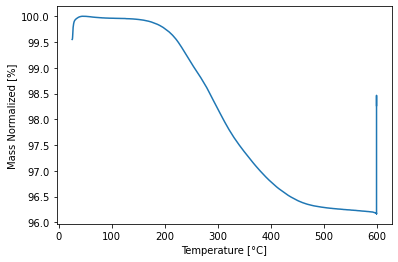

In [109]:
plt.plot(data['Tr_[°C]'].values, data['Mass_normalized_[%]'].values)
plt.xlabel('Temperature [°C]')
plt.ylabel('Mass Normalized [%]')
plt.show()

In [114]:
mono.to_csv('result.csv', header=False)

In [118]:
plt.savefig('test.png')

<Figure size 432x288 with 0 Axes>